In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model

In [25]:
df = pd.read_csv("weather_classification_data.csv")
df.shape

(13200, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [27]:
df.head(8)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Weather Type'] = le.fit_transform(df['Weather Type'].fillna('none'))
df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'].fillna('none'))
df['Season'] = le.fit_transform(df['Season'].fillna('none'))



In [29]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1.990227,1005.827896,4.005758,1.849394,5.462917,1.500000
std,17.386327,20.194248,6.908704,31.946541,1.012302,37.199589,3.856600,1.164824,3.371499,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,2.000000,994.800000,1.000000,1.000000,3.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,2.000000,1007.650000,3.000000,2.000000,5.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,3.000000,1016.772500,7.000000,3.000000,7.500000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,3.000000


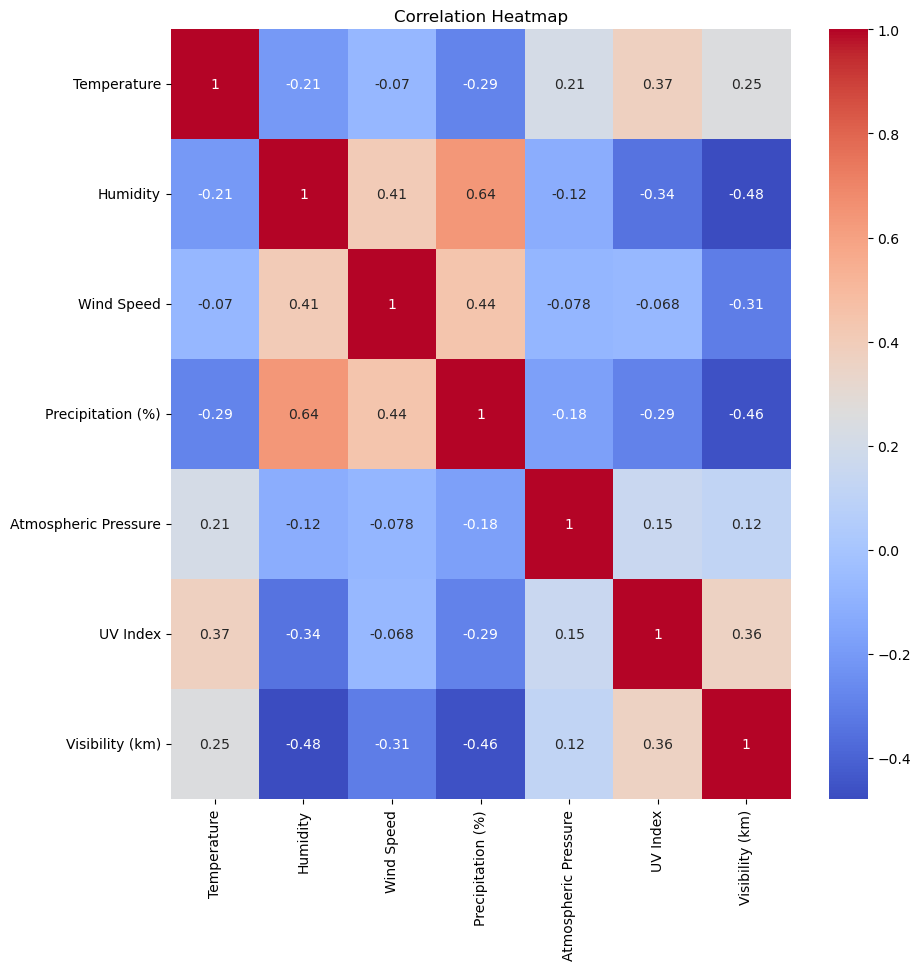

In [30]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [155]:
from sklearn.model_selection import train_test_split

#x = df[['Temperature', 'Humidity','UV Index','Precipitation (%)','Visibility (km)','Atmospheric Pressure','Cloud Cover']]
x=df[['Temperature','UV Index', 'Precipitation (%)', 'Visibility (km)', 'Cloud Cover']]
y = df['Weather Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=82)


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

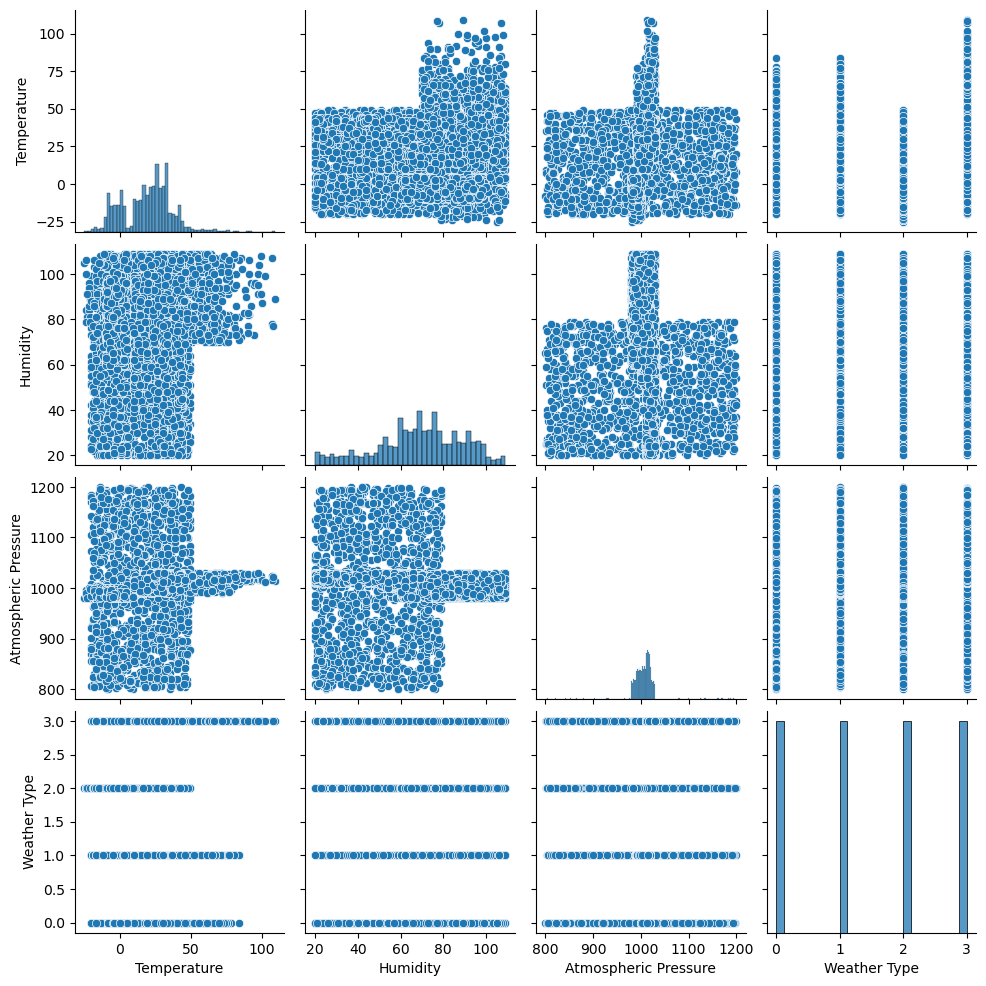

In [157]:
sns.pairplot(df[['Temperature', 'Humidity', 'Atmospheric Pressure', 'Weather Type']])
plt.show()

# **Calassification Models**

In [158]:
#Samia
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
lg_reg = LogisticRegression()
lg_reg.fit(x_train_scaled,y_train)
y_lg_pred = lg_reg.predict(x_test_scaled)
print("acuuracy score", accuracy_score(y_test,y_lg_pred))

acuuracy score 0.8715151515151515


In [159]:
#KHaled
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)
y_pred_svc = svc.predict(x_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

SVC Accuracy: 0.9103030303030303


In [194]:
#Samia
#Desission Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=15, min_samples_leaf=5)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9109090909090909


In [191]:
#hanin
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9084848484848485


Precision (macro): 0.8708584162473663
Recall (macro): 0.8704783827602708


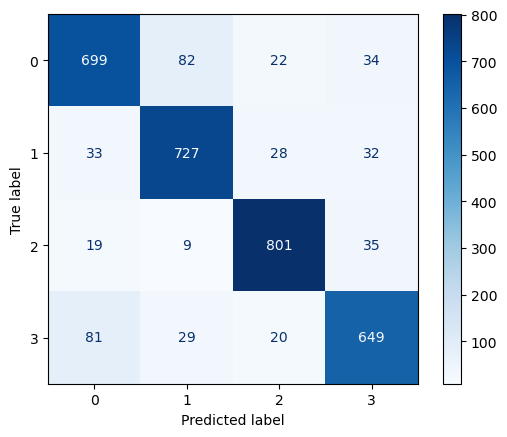

In [140]:
#samia
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
print("Precision (macro):", precision_score(y_test, y_lg_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_lg_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_lg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [17]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale features to the range [0, 1]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Select top 4 features using Chi-Square
selector = SelectKBest(chi2, k=5)
x_new = selector.fit_transform(x_scaled, y)

print(selector.get_support())  # Boolean mask of selected features
print(x.columns[selector.get_support()])  # Names of selected features


[ True  True  True  True  True]
Index(['Temperature', 'UV Index', 'Precipitation (%)', 'Visibility (km)',
       'Cloud Cover'],
      dtype='object')


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

importances = model.feature_importances_
feature_importances = pd.Series(importances, index=x.columns)
print(feature_importances.sort_values(ascending=False))


Temperature          0.313849
Visibility (km)      0.209455
UV Index             0.179365
Precipitation (%)    0.175933
Cloud Cover          0.121398
dtype: float64


#  Regression **Analysis**

In [196]:
X_reg = df[['Temperature','UV Index', 'Precipitation (%)', 'Visibility (km)', 'Cloud Cover']]
y_reg = df['Weather Type']




# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=82)

# Scaling for regression
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [197]:
#Samia
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin_reg = lin_reg.predict(X_test_reg_scaled)
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Linear Regression Coefficients: [-0.18137773  0.30096641 -0.05648686 -0.11792806 -0.54281991]
Intercept: 1.5065656565656569


In [198]:
#Khaled
#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_reg_scaled, y_train_reg)
y_pred_svr = svr.predict(X_test_reg_scaled)

In [199]:
#samia
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_reg_scaled)
X_test_poly = poly.transform(X_test_reg_scaled)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train_reg)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

In [200]:
#Samia
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to evaluate regression models
def evaluate_regression(y_true, y_pred, X_train):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")

print("Linear Regression Evaluation:")
evaluate_regression(y_test, y_pred_lin_reg, x_train_scaled)

print("\nSVR Evaluation:")
evaluate_regression(y_test, y_pred_svr, x_test_scaled)

print("\nPolynomial Regression Evaluation:")
evaluate_regression(y_test, y_pred_poly, x_train_scaled)

Linear Regression Evaluation:
MSE: 0.7890107007152019
RMSE: 0.8882627430637862
MAE: 0.706466936851502

SVR Evaluation:
MSE: 0.22231584692138512
RMSE: 0.471503814323262
MAE: 0.23365618037536842

Polynomial Regression Evaluation:
MSE: 0.38057352808920364
RMSE: 0.6169064176106483
MAE: 0.44526844067234583


# **Ensambel Learning**

In [ ]:
pip install xgboost

In [202]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=82)

# Train the model
rf_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9084848484848485
Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       837
           1       0.88      0.91      0.90       820
           2       0.94      0.92      0.93       864
           3       0.92      0.91      0.92       779

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [206]:
#voting

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define individual classifiers
log_reg = LogisticRegression(random_state=82)
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=82)
random_forest = RandomForestClassifier(n_estimators=50, random_state=82)

# Combine classifiers into Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest)
    ],
    voting='hard'  # Use 'hard' voting (majority voting), or 'soft' if probabilities are used
)

# Train the ensemble
voting_clf.fit(x_train_scaled, y_train)

# Make predictions
y_pred = voting_clf.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")



Ensemble Model Accuracy: 0.91


In [208]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Updated parameter name
    n_estimators=50,
    max_samples=0.7,
    bootstrap=True,
    random_state=82
)
bagging_clf.fit(x_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(x_test_scaled)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Model Accuracy: {bagging_accuracy:.2f}")


Bagging Model Accuracy: 0.91


In [218]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=100,     # Number of trees
    learning_rate=0.2,    # Shrinks the contribution of each tree
    max_depth=3,          # Maximum depth of trees
    random_state=82,
    eval_metric='mlogloss' 
)
xgb_clf.fit(x_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(x_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")


XGBoost Model Accuracy: 0.91


In [219]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Shrinks the contribution of each tree
    max_depth=3,       # Maximum depth of individual trees
    random_state=82
)
gb_clf.fit(x_train_scaled, y_train)
y_pred_gb = gb_clf.predict(x_test_scaled)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Model Accuracy: 0.91
